# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# !pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='./Reacher_Linux_one_agent_NoVis/Reacher.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='./Reacher_Linux_twenty_agents_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
env.reset(train_mode=True)[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.30408478e+00 -1.00000000e+00
 -4.92529202e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.33014059e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
# env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
from DeepRL.deep_rl.network import *
from DeepRL.deep_rl.component import *
from DeepRL.deep_rl.agent.BaseAgent import *
import torchvision


In [9]:
num_agents = 1

In [10]:

class DDPGAgent:
    def __init__(self):
        self.max_steps = int(1e6)
        self.eval_interval = int(1e4)
        self.eval_episodes = 20
        
        state_dim = 33
        action_dim = 4

        self.network_fn = lambda: DeterministicActorCriticNet(
            state_dim, action_dim,
            actor_body=FCBody(state_dim, (100, 50, 20), gate=F.relu),
            critic_body=FCBody(state_dim + action_dim, (100, 50, 20), gate=F.relu),
            actor_opt_fn=lambda params: torch.optim.Adam(params, lr=1e-3),
            critic_opt_fn=lambda params: torch.optim.Adam(params, lr=1e-3))

        self.replay_fn = lambda: UniformReplay(memory_size=int(1e6), batch_size=100)
        self.discount = 0.99
        self.random_process_fn = lambda: OrnsteinUhlenbeckProcess(
            size=(action_dim,), std=LinearSchedule(0.2))
        
        self.warm_up = int(1e4)
        
        self.target_network_mix = 5e-3
    
        self.network = self.network_fn()
        self.target_network = self.network_fn()
        self.target_network.load_state_dict(self.network.state_dict())
        
        self.replay = self.replay_fn()
        
        self.random_process = self.random_process_fn()
        self.random_process.reset_states()
        
        self.total_steps = 0
        self.state = None
        
        self.state_normalizer = lambda x: x
        
        self.device = "cpu" # torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        
        self.t_step = 0
        
        self.UPDATE_EVERY = 4
        
        self.models = {'network_actor': self.network.actor_body,
                       'network_critic': self.network.critic_body,
                       'target_actor': self.target_network.actor_body,
                       'target_critic': self.target_network.critic_body}

    def soft_update(self, target, src):
        for target_param, param in zip(target.parameters(), src.parameters()):
            target_param.detach_()
            target_param.copy_(target_param * (1.0 - self.target_network_mix) +
                               param * self.target_network_mix)
            
    def save(self, model_nm):
        path = os.sep.join(['.', 'model_weights', model_nm])
        if not os.path.exists(path):
            os.makedirs(path)
            
        for nm, model in self.models.items():
            weights = model.state_dict()
            torch.save(weights, os.sep.join([path, nm]))

    def load(self, model_nm):
        path = os.sep.join(['.', 'model_weights', model_nm])
            
        for nm, model in self.models.items():
            state_dict = torch.load(os.sep.join([path, nm]))
            model.load_state_dict(state_dict)
            
    def act(self, state):
        state = torch.from_numpy(state).float().to(self.device)
        
        if self.total_steps < self.warm_up:
            action = np.random.rand(4*num_agents).reshape(-1, 4)
        else:
            action = self.network(state)
            action = to_np(action)
            action += self.random_process.sample()
            
        #Not needed, we will use tanh activation
        #action = np.clip(action, -1, 1)
        
        self.total_steps += 1
        
        return action
        
    def eval_step(self, state):
        state = self.state_normalizer(state)
        action = self.network(state)
        return to_np(action)

    def step(self, state, action, reward, next_state, done):

        self.replay.feed(dict(
            state=state,
            action=action,
            reward=reward,
            next_state=next_state,
            mask=1-np.asarray(done, dtype=np.int32),
        ))

#         if done:
#             self.random_process.reset_states()

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.UPDATE_EVERY
        
        if (self.t_step == 0) and (self.replay.size() >= self.warm_up):
            self.learn()
        
    def learn(self):
        transitions = self.replay.sample()
        states = tensor(transitions.state)
        actions = tensor(transitions.action)
        rewards = tensor(transitions.reward).unsqueeze(-1)
        next_states = tensor(transitions.next_state)
        mask = tensor(transitions.mask).unsqueeze(-1)

        phi_next = self.target_network.feature(next_states)
        a_next = self.target_network.actor(phi_next)
        q_next = self.target_network.critic(phi_next, a_next)
        q_next = self.discount * mask * q_next
        q_next.add_(rewards)
        q_next = q_next.detach()
        phi = self.network.feature(states)
        q = self.network.critic(phi, actions)
        critic_loss = (q - q_next).pow(2).mul(0.5).sum(-1).mean()

        self.network.zero_grad()
        critic_loss.backward()
        self.network.critic_opt.step()

        phi = self.network.feature(states)
        action = self.network.actor(phi)
        policy_loss = -self.network.critic(phi.detach(), action).mean()

        self.network.zero_grad()
        policy_loss.backward()
        self.network.actor_opt.step()

        self.soft_update(self.target_network, self.network)

In [11]:
from collections import deque
def ddpg(n_episodes=10000, max_t=10000):
    """Deep Q-Learning.

    Params
    ======
      n_episodes (int): maximum number of training episodes
      max_t (int): maximum number of timesteps per episode
    """
    scores_l = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    agent = DDPGAgent()
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment   
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents) 

        agent.random_process.reset_states() # should this really be restarted every episode?
        
        while True:
            #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = agent.act(states)                # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_window.append(scores[0])  # save most recent score
        scores_l.append(scores[0])  # save most recent score
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode,
                                                       np.mean(scores_window)),
                                                      end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 30:
            print(
            '\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
              i_episode - 100, np.mean(scores_window)))
            agent.save('successfull_model')
            break
    return scores_l


Episode 100	Average Score: 1.98
Episode 200	Average Score: 6.00
Episode 300	Average Score: 13.06
Episode 400	Average Score: 15.38
Episode 500	Average Score: 14.73
Episode 600	Average Score: 16.83
Episode 700	Average Score: 21.01
Episode 800	Average Score: 28.25
Episode 900	Average Score: 28.73
Episode 967	Average Score: 30.01
Environment solved in 867 episodes!	Average Score: 30.01


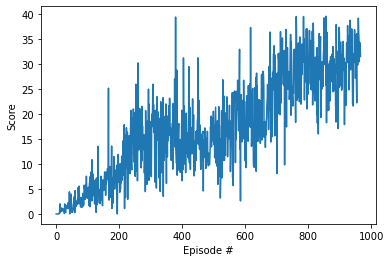

In [12]:
scores = ddpg()

# plot the scores
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
env.close()

In [2]:
def f(x):
    return 2*x

In [5]:
g = lambda: f(x=lambda params: 2)

In [9]:
g()

TypeError: unsupported operand type(s) for *: 'int' and 'function'

In [ ]:
self.network_fn = lambda: DeterministicActorCriticNet(
    state_dim, action_dim,
    actor_body=FCBody(state_dim, (100, 50, 20), gate=F.relu),
    critic_body=FCBody(state_dim + action_dim, (100, 50, 20), gate=F.relu),
    actor_opt_fn=lambda params: torch.optim.Adam(params, lr=1e-3),
    critic_opt_fn=lambda params: torch.optim.Adam(params, lr=1e-3))

In [11]:
c = lambda params: 2

In [13]:
c(10)

2